# House price prediction in boston area: Multiple linear regression

In [1]:
import os
os.getcwd()

'C:\\Users\\rajsh\\pythonanaconda\\python projects'

### <font color= indigo>Importing necessary libraries:<font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

### <font color= indigo>Loading data set:<font>

In [3]:
df = pd.read_csv(r'C:\Users\rajsh\pythonanaconda\python projects\housing.csv')
#Creating a copy of original data set
df_cpy=df.copy()

### <font color= indigo>Understanding dataset:<font>

In [4]:
#To get idea about number of rows and columns
df.shape

(506, 14)

Here we can see that boston housing dataset has 506 rows and 14 columns.

In [5]:
#To get 1st five rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The dataset includes the following columns:

crim: Crime rate - This column represents the per capita crime rate in the neighborhood.

zn: Proportion of residential land zoned for large lots - It indicates the proportion of residential land in the neighborhood that is zoned for large lots (greater than 25,000 sq. ft.).

indus: Proportion of non-retail business acres per town - This column represents the proportion of non-retail business acres per town.

chas: Charles River dummy variable - It is a binary variable that equals 1 if the property is located along the Charles River and 0 otherwise.

nox: Nitrogen oxide concentration - This column represents the concentration of nitrogen oxide (NOX) in the air, measured in parts per million.

rm: Average number of rooms per dwelling - It indicates the average number of rooms per dwelling in the neighborhood.

age: Proportion of owner-occupied units built before 1940 - This column represents the proportion of owner-occupied housing units that were built before 1940.

dis: Weighted distance to employment centers - It represents the weighted distance to employment centers in the Boston area.

rad: Index of accessibility to radial highways - This column represents an index of accessibility to radial highways.It is also a categorical variable.

tax: Property tax rate - It indicates the property tax rate for the neighborhood.

ptratio: Pupil-teacher ratio - This column represents the pupil-teacher ratio in the neighborhood's schools.

b: Proportion of residents of African American descent - It represents the proportion of residents of African American descent in the neighborhood.

lstat: Percentage of lower-status population - This column represents the percentage of the lower-status population in the neighborhood.

medv: Median value of owner-occupied homes - The target variable, this column represents the median value of owner-occupied homes in thousands of dollars. This is often the variable of interest in regression analysis, as it is the target to be predicted.

In [6]:
#To get total missisng values in each column
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

We can see that this dataset has no missing values in any columns.

In [7]:
#To get information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


We can see that all columns except 'chas','rad' and 'tax' are continuous.

In [8]:
#To get rough mathematical summary of each column
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see that magnitude of columns vary widely, so their may be problem in fitting linear model.Columns having high magnitude will get more weight while computing estimate for coefficients if we directly fill model to this data without scaling.

### <font color= indigo>Exploratory data analysis:<font>

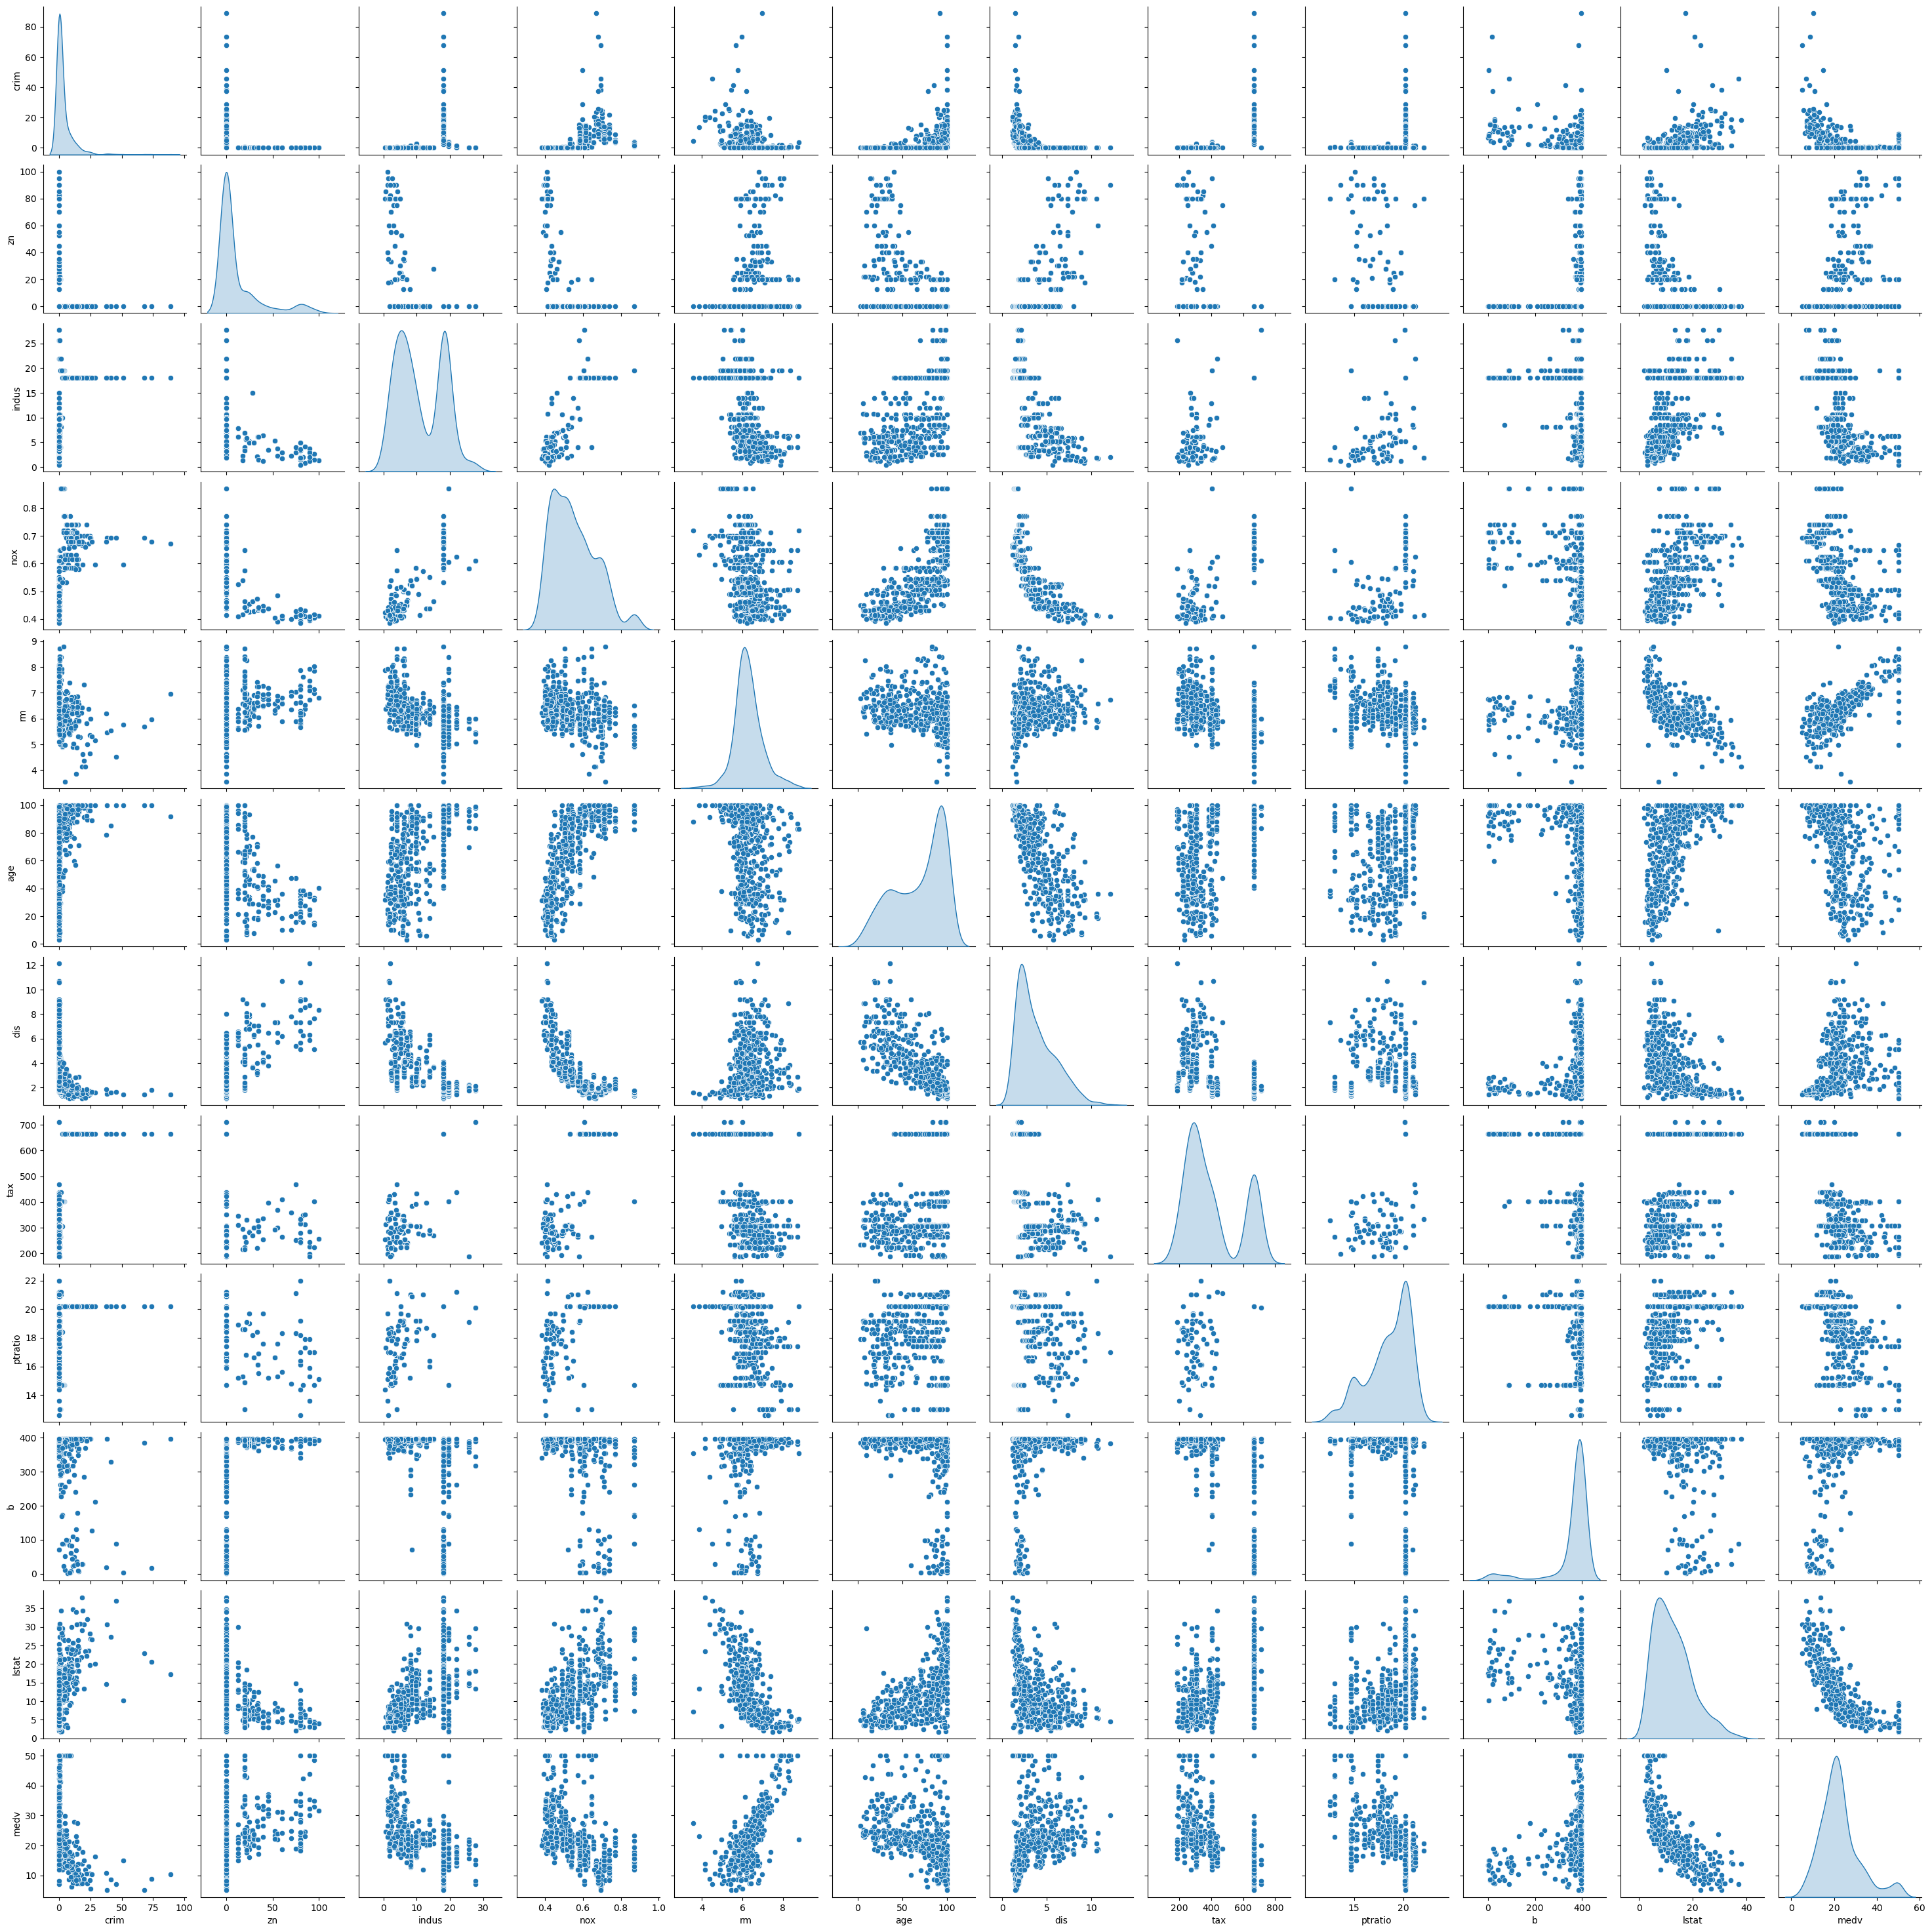

In [9]:
# Using pair plot we see if there is any relationship between feature columns(except 'chas' and 'rad') and target column 'medv'.
df_dropped=df.drop(['chas', 'rad'],axis=1)
sns.pairplot(df_dropped,diag_kind="kde")
plt.show()

We can observe following results:
1. Most of the data in crim column and zn column is 0.
2. indus,nox and lstat columns show some non-linear relationship with medv.
3. rm is linearly related to medv.
4. crim,zn,age,dis,tax,ptratio and b columns do not clearly show any kind of relationship with medv.
5. dis and nox columns shows some non-linear relationship.

Text(0.5, 1.0, 'rad')

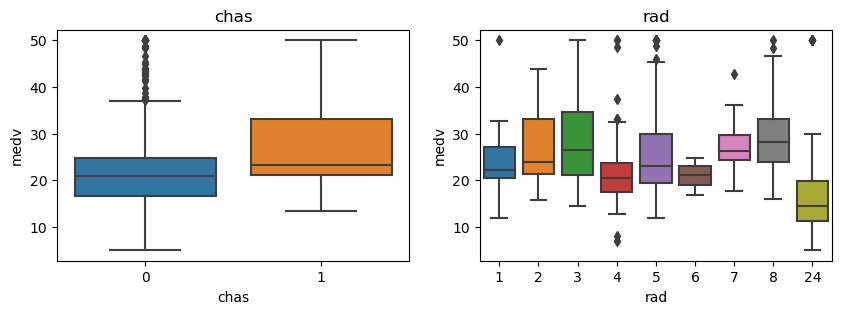

In [10]:
# Using boxplot we see for possible relation between feature columns('chas' and 'rad') and target column 'medv'
plt.figure(figsize=(10, 3))   

plt.subplot(1, 2, 1)
sns.boxplot(x = df['chas'], y = df.medv)
plt.title('chas')

plt.subplot(1, 2, 2)
sns.boxplot(x = df['rad'], y = df.medv)
plt.title('rad')

Clearly we can see that price of houses near to charles river are higher.We can't clearly see any effect in house prices by rad variable.But we observe one thing that price of those houses which are very far from highways are low.

In [11]:
#To get rough idea regarding relationship between various columns
correlation_matrix=df.corr()
correlation_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


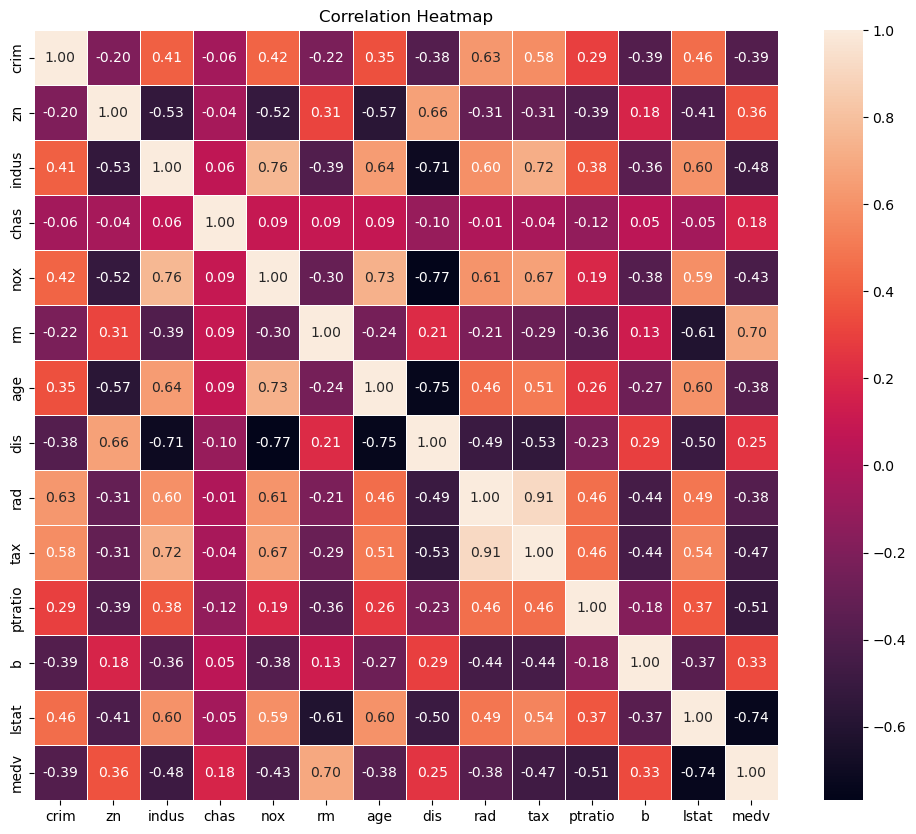

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Clearly we see that 'rm' and 'lstat' shows nice correlation with medv.And 'rad' and 'tax' are highly correlated ,so here we may need to remove one or more columns.

<Axes: xlabel='medv', ylabel='Count'>

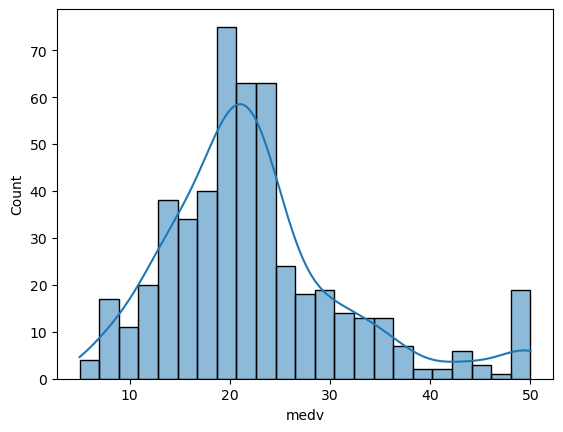

In [13]:
sns.histplot(df.medv,kde=True)

We see that medv is not perfectly normally distributed so we can use transformations to make it normal.

Text(0.5, 1.0, 'lstat')

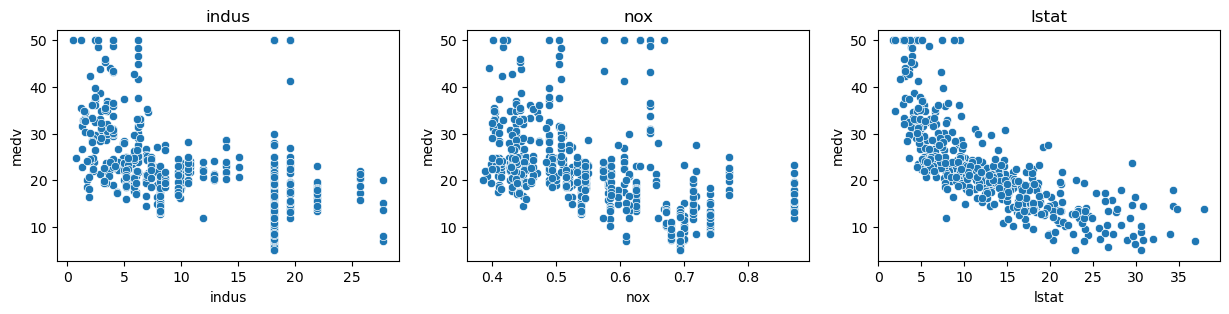

In [14]:
plt.figure(figsize=(15, 3))  

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'indus', y = 'medv',data = df)
plt.title('indus')

plt.subplot(1, 3, 2)
sns.scatterplot(x = 'nox', y = 'medv',data = df)
plt.title('nox')

plt.subplot(1, 3, 3)
sns.scatterplot(x = 'lstat', y = 'medv',data = df)
plt.title('lstat')

With scatterplot we can say that lstat shows some non-linear relationship with medv so we can use some transformation on lstat to get a linear relation with medv.But no clear relationship can be seen between indus and medv and between nox and medv. 

### <font color= indigo>Splitting data:<font>

1. Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
2. We will use train_test_split method from sklearn package for this

In [15]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 42)

In [16]:
df_train.shape

(354, 14)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     354 non-null    float64
 1   zn       354 non-null    float64
 2   indus    354 non-null    float64
 3   chas     354 non-null    int64  
 4   nox      354 non-null    float64
 5   rm       354 non-null    float64
 6   age      354 non-null    float64
 7   dis      354 non-null    float64
 8   rad      354 non-null    int64  
 9   tax      354 non-null    int64  
 10  ptratio  354 non-null    float64
 11  b        354 non-null    float64
 12  lstat    354 non-null    float64
 13  medv     354 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 41.5 KB


In [18]:
df_test.shape

(152, 14)

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     152 non-null    float64
 1   zn       152 non-null    float64
 2   indus    152 non-null    float64
 3   chas     152 non-null    int64  
 4   nox      152 non-null    float64
 5   rm       152 non-null    float64
 6   age      152 non-null    float64
 7   dis      152 non-null    float64
 8   rad      152 non-null    int64  
 9   tax      152 non-null    int64  
 10  ptratio  152 non-null    float64
 11  b        152 non-null    float64
 12  lstat    152 non-null    float64
 13  medv     152 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 17.8 KB


### <font color= indigo>Feature engineering:<font>

In [20]:
#Scaling feature columns using MinMax scaler
#If not scale, the feature with a higher magnitude value starts dominating when calculating distances.

scaler = MinMaxScaler()
#scaling numerical features
num_vars = ['crim', 'zn', 'indus', 'nox','rm','age','dis','tax','ptratio','b','lstat']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [21]:
# Checking values after scaling
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
5,0.000234,0.0,0.036562,0,0.150206,0.522066,0.574665,0.448545,3,0.066794,0.648936,0.992990,0.096026,28.7
116,0.001377,0.0,0.331700,0,0.333333,0.470409,0.716787,0.145541,6,0.467557,0.553191,0.990922,0.284492,21.2
45,0.001825,0.0,0.214851,0,0.129630,0.369941,0.318229,0.361084,3,0.087786,0.563830,1.000000,0.233996,19.3
16,0.011744,0.0,0.261214,0,0.314815,0.421395,0.271885,0.306359,4,0.229008,0.893617,0.974658,0.133830,23.1
468,0.174971,0.0,0.636638,0,0.401235,0.419565,0.701339,0.161755,24,0.914122,0.808511,0.928993,0.452539,19.1


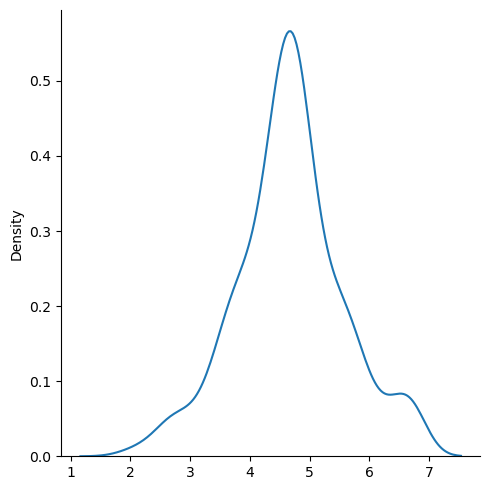

In [22]:
#Applying Box-cox transformation to medv column
X = df_train.iloc[:,0:13]
y = df_train.iloc[:,-1]
y_transformed, lambda_value = stats.boxcox(y)
sns.displot(y_transformed, kind="kde")
df_train.medv=y_transformed

Now we see that distribution of medv is somewhat normal.

In [23]:
#Applying backward elimination method to find best feature columns for our linear model

# Step 1: Choose a significance level (e.g., alpha = 0.05)
alpha = 0.05

# Step 2: Fit the initial model with all features
X = df_train.drop('medv', axis=1)
y = df_train['medv']
X = sm.add_constant(X)  # Add a constant term (intercept) to the model

# Step 3: Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Step 8: Repeat Steps 3-7 until all p-values are below alpha
while True:
    # Step 4: Identify the feature with the highest p-value
    max_p_value = model.pvalues.drop('const').max()
    
    # Step 5: Check if the highest p-value is greater than alpha
    if max_p_value > alpha:
        # Step 6: Remove the feature with the highest p-value
        feature_to_remove = model.pvalues.idxmax()
        X = X.drop(feature_to_remove, axis=1)
        
        # Step 7: Refit the model
        model = sm.OLS(y, X).fit()
    else:
        break

# Step 9: Evaluate the final model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.60e-109
Time:                        13:38:42   Log-Likelihood:                -189.09
No. Observations:                 354   AIC:                             398.2
Df Residuals:                     344   BIC:                             436.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1982      0.227     22.942      0.0

We can see that 'indus','tax', 'age'and 'zn' columns have p-value > 0.05 ,that means their coefficients in full linear model is 0,so we can eliminate them.

In [24]:
#Dropping "indus" and "age" column.
df_train = df_train.drop(columns=['indus', 'age','tax','zn'])
df_train.head()

,crim,chas,nox,rm,dis,rad,ptratio,b,lstat,medv
5,0.000234,0,0.150206,0.522066,0.448545,3,0.648936,0.992990,0.096026,5.305865
116,0.001377,0,0.333333,0.470409,0.145541,6,0.553191,0.990922,0.284492,4.620400
45,0.001825,0,0.129630,0.369941,0.361084,3,0.563830,1.000000,0.233996,4.418427
16,0.011744,0,0.314815,0.421395,0.306359,4,0.893617,0.974658,0.133830,4.809301
468,0.174971,0,0.401235,0.419565,0.161755,24,0.808511,0.928993,0.452539,4.396316


Now we will proceed to assumptions checking.

# Checking assumptions of our model

1. Checking for multicollinearity

In [25]:
X = df_train.iloc[:,0:9]
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  Features        VIF
0     crim   2.011425
1     chas   1.167763
2      nox   9.434018
3       rm  11.762254
4      dis   5.171737
5      rad   6.064049
6  ptratio   9.543502
7        b  15.723848
8    lstat   6.676843


Again VIF of 'b' column is > 10 and we can't see any possible way to combine 'b' with any other feature column,so we will remove this column.

In [26]:
#Dropping "b" column
df_train = df_train.drop(columns=['b'])

#Again checking VIF
X = df_train.iloc[:,0:8]
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  Features       VIF
0     crim  2.010144
1     chas  1.155554
2      nox  8.826320
3       rm  8.606344
4      dis  4.489353
5      rad  5.559819
6  ptratio  8.401422
7    lstat  6.539329


Now we can see that VIF of all columns are <10 so we proceed to next assumption.

In [27]:
#Fitting model
X_train = df_train.iloc[:,0:8]
y_train = df_train.iloc[:,-1]
X_train = sm.add_constant(X_train)  # Add a constant term (intercept) to the model

lr1 = sm.OLS(y_train, X_train).fit()

y_train_pred = lr1.predict(X_train)
residuals = lr1.resid

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.32e-106
Time:                        13:38:42   Log-Likelihood:                -198.74
No. Observations:                 354   AIC:                             415.5
Df Residuals:                     345   BIC:                             450.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7522      0.193     29.792      0.0

2. Checking linearity in parameters

In [28]:
def Rainbow_lin_test(model):
    lin_p = sm.stats.linear_rainbow(model, frac= 0.5)[1]
    F= sm.stats.linear_rainbow(model, frac= 0.5)[0]
    result= "Fail"
    if lin_p>0.1:
        result= "Pass"
    return (np.transpose(pd.DataFrame([F, lin_p, 0.1, result], columns= ['Rainbow Linearity P-value'], index=['F Stat','P-value', 'Threshold', 'Result'])))
Rainbow_lin_test(lr1)

,F Stat,P-value,Threshold,Result
Rainbow Linearity P-value,1.10749,0.252229,0.1,Pass


Rainbow test gives a p-value of 0.2522 which implies that we don't have sufficient evidence to reject null hypothesis. Hence we conclude that the overall fit is almost same as the fit for the subsample.

3. Checking normality of residuals

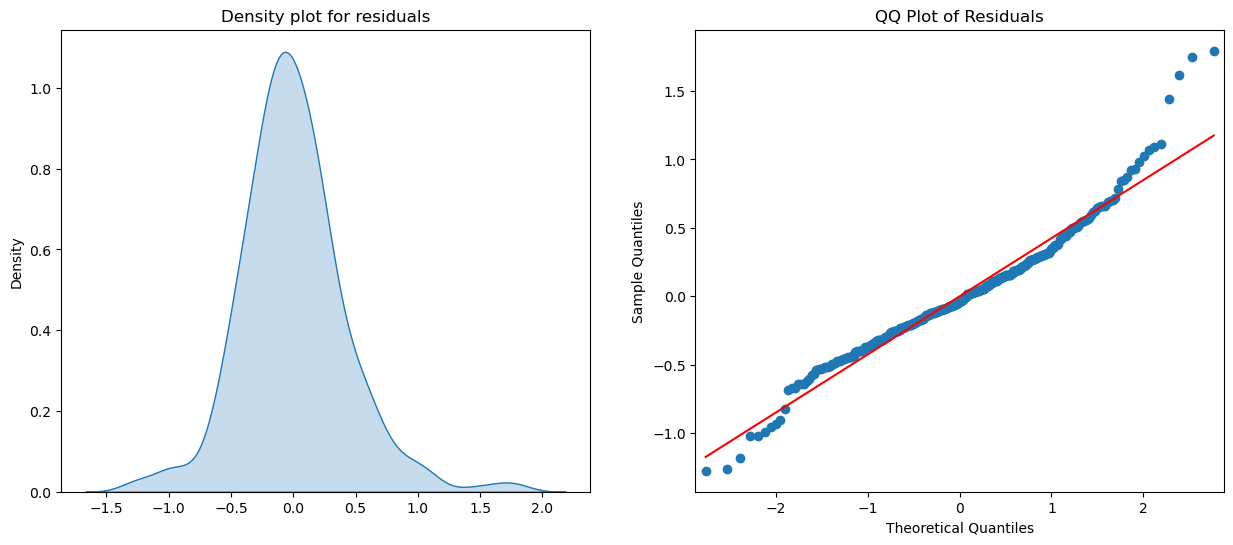

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(residuals, fill=True, ax=axes[0])
axes[0].set_title('Density plot for residuals')

qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('QQ Plot of Residuals')

plt.show()

We can see that residuals almost follow normal distribution.

4. Checking homoscedasticity of our model

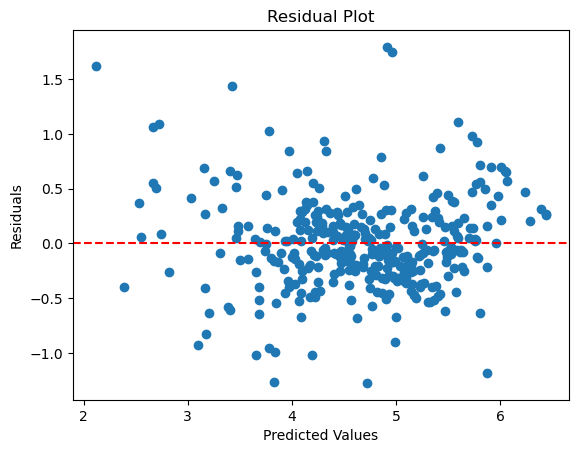

Mean of residuals: 2.5503767334044556e-14
Mean Squared Error: 0.18


In [30]:
# Plotting residuals vs. predicted values
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

print("Mean of residuals:",np.mean(residuals))
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error: {mse:.2f}")

5) Checking auto-correlation between residuals

In [31]:
# Calculate the Durbin-Watson statistic
durbin_watson_statistic = durbin_watson(residuals)

# Print the Durbin-Watson statistic
print("Durbin-Watson Statistic:", durbin_watson_statistic)

# Interpret the result
if durbin_watson_statistic < 1.5:
    print("Positive autocorrelation may be present (values < 1.5)")
elif durbin_watson_statistic > 2.5:
    print("Negative autocorrelation may be present (values > 2.5)")
else:
    print("No significant autocorrelation detected (around 2.0)")

Durbin-Watson Statistic: 2.165472985675643
No significant autocorrelation detected (around 2.0)


### <font color= indigo>Final model interpretation<font>

In [32]:
#Fitting final model

X_train = df_train.iloc[:,0:8]
y_train = df_train.iloc[:,-1]
X_train = sm.add_constant(X_train)  # Add a constant term (intercept) to the model

lr = sm.OLS(y_train, X_train).fit()
y_train_pred = lr.predict(X_train)

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(lr1.summary())
print("Mean Cross validation Score:", cv_scores.mean())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.32e-106
Time:                        13:38:44   Log-Likelihood:                -198.74
No. Observations:                 354   AIC:                             415.5
Df Residuals:                     345   BIC:                             450.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7522      0.193     29.792      0.0

We see that 'medv' column is highly influenced by 'lstat','crim','rm' and 'dis' columns.A unit rise in 'lstat','crim' and 'dis' columns decreases 'medv' by 2.36,1.84,1.02 and a unit rise in 'rm' increases 'medv' by 1.25.

### <font color= indigo>Deploying model on testing data<font>

In [33]:
#Scaling feature columns of testing dataset using MinMax scaler

scaler = MinMaxScaler()
#scaling numerical features
num_vars = ['crim', 'zn', 'indus', 'nox','rm','age','dis','tax','ptratio','b','lstat']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [34]:
# Checking values after scaling
df_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
173,0.001162,0.0,0.131598,0,0.246347,0.552866,0.830490,0.154823,5,0.206501,0.400000,0.996450,0.180645,23.6
274,0.000682,0.4,0.218109,1,0.114823,0.619094,0.284648,0.304836,4,0.126195,0.511111,1.000000,0.019062,32.4
491,0.001352,0.0,1.000000,0,0.453027,0.469016,0.987207,0.073261,4,1.000000,0.788889,0.982783,0.445455,13.6
72,0.001160,0.0,0.379399,0,0.043841,0.484895,0.017058,0.431623,4,0.223709,0.688889,0.984812,0.077419,22.8
452,0.069142,0.0,0.646628,0,0.670146,0.529822,0.912580,0.125676,24,0.913958,0.800000,0.970054,0.421994,16.1


<Axes: ylabel='Density'>

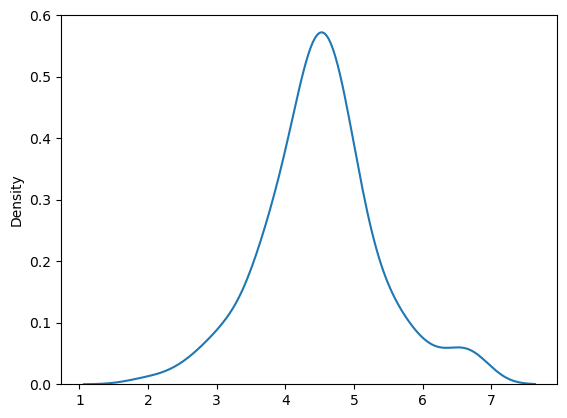

In [36]:
#Applying box-cox transformation on target variable
y_test = df_test['medv']
y_test = stats.boxcox(y_test, lmbda = lambda_value)
df_test['medv'] = y_test
sns.kdeplot(y_test)

In [37]:
y_test = df_test.iloc[:,-1]
#Selecting the variables that were part of final model.
col = ['crim','chas','nox','rm','dis','rad','ptratio','lstat']
X_test = df_test[col]
X_test = sm.add_constant(X_test) # Adding constant variable to test dataframe
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   const    152 non-null    float64
 1   crim     152 non-null    float64
 2   chas     152 non-null    int64  
 3   nox      152 non-null    float64
 4   rm       152 non-null    float64
 5   dis      152 non-null    float64
 6   rad      152 non-null    int64  
 7   ptratio  152 non-null    float64
 8   lstat    152 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [38]:
#Fitting final linear model to test dataset
y_test_pred = lr.predict(X_test)

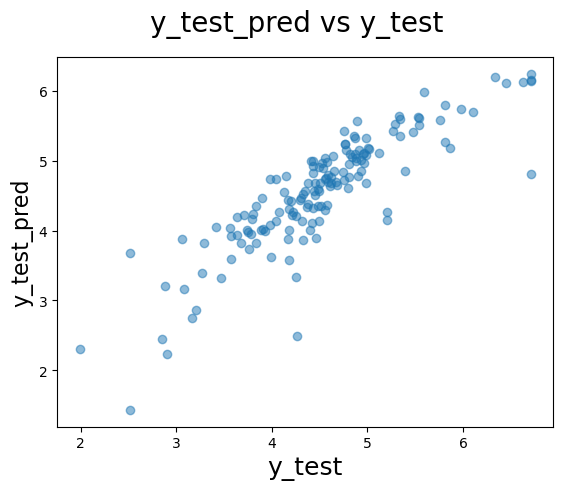

In [39]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test_pred vs y_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [40]:
from scipy.stats import pearsonr
r2,p_value= pearsonr(y_test, y_test_pred)
print("R^2: ", r2*r2)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2*r2)*(n-1)/(n-p-1)
print("Adjusted R^2: ", adjusted_r2)

model = LinearRegression()
cv_scores = cross_val_score(model, X_test, y_test, cv=5)

print("Mean Cross validation Score:", cv_scores.mean())

R^2:  0.7481438973006375
Adjusted R^2:  0.7321811865661708
Mean Cross validation Score: 0.6666391894052562


Since we observed that transforming lstat can help improving model accuracy so lets see what effect it gives after transforming.

### <font color= indigo>Improving accuracy of model<font>

         crim  chas       nox        rm       dis  rad   ptratio     lstat
5    0.000234     0  0.150206  0.522066  0.448545    3  0.648936  0.356936
116  0.001377     0  0.333333  0.470409  0.145541    6  0.553191  0.628138
45   0.001825     0  0.129630  0.369941  0.361084    3  0.563830  0.574760
16   0.011744     0  0.314815  0.421395  0.306359    4  0.893617  0.432520
468  0.174971     0  0.401235  0.419565  0.161755   24  0.808511  0.760665
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     170.1
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          8.34e-115
Time:                        13:39:56   Log-Likelihood:                -178.69
No. Observations:                 354   AIC:                             375

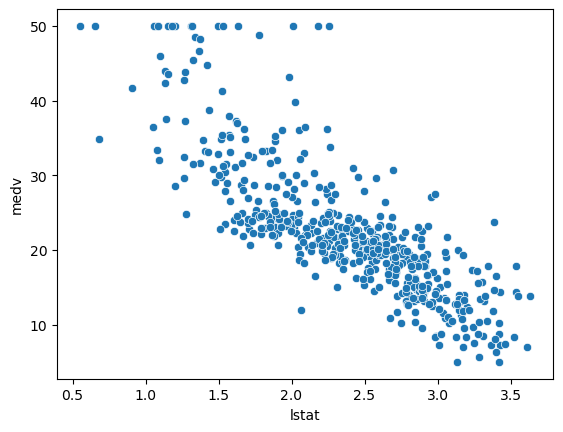

In [41]:
df = pd.read_csv(r'C:\Users\rajsh\pythonanaconda\python projects\housing.csv')
#Applying log transform to 'lstat' column
df['lstat']=np.log(df['lstat'])
df=df.drop(columns=['indus','age','zn','b','tax'])
sns.scatterplot(x = 'lstat', y = 'medv',data = df)

#Applying scaling
scaler = MinMaxScaler()

X = df.iloc[:,0:8]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#scaling numerical features
num_vars = ['crim', 'nox','rm','dis','ptratio','lstat']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

#Applying transformation on medv
y_train, lambda_value = stats.boxcox(y_train)
print(X_train.head())

#Again applying linear model
X_train = sm.add_constant(X_train)  # Add a constant term (intercept) to the model

lr2 = sm.OLS(y_train, X_train).fit()

y_train_pred = lr2.predict(X_train)
residuals = lr2.resid
print(lr2.summary())

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Mean Cross validation Score:", cv_scores.mean())

We can clearly see that model accuracy has increased and relation between lstat and medv has also change to linear.

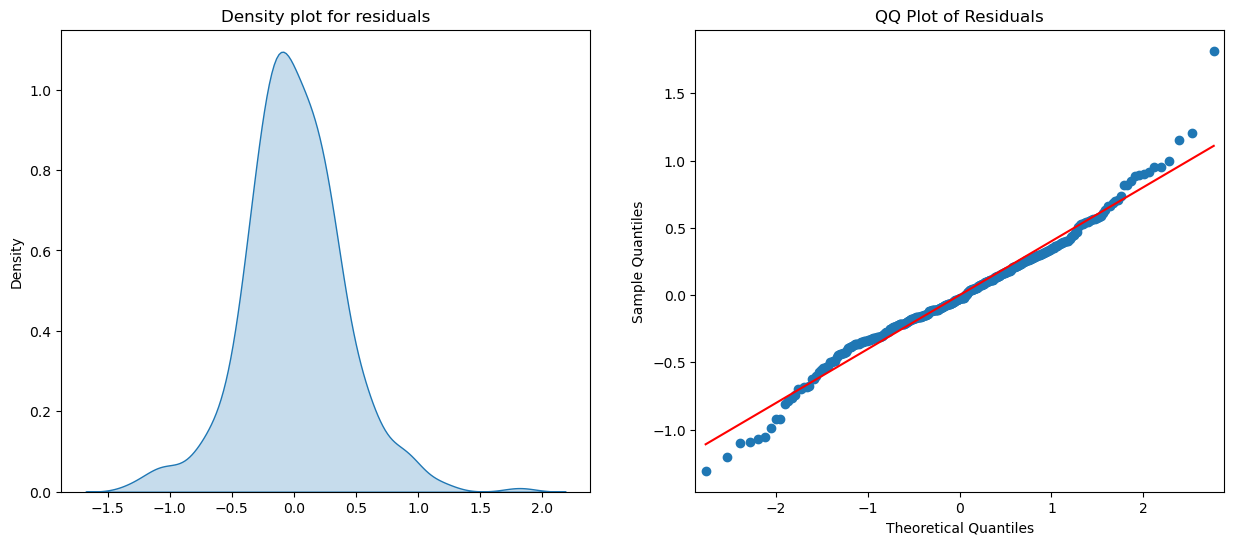

In [42]:
#Checking normality of residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(residuals, fill=True, ax=axes[0])
axes[0].set_title('Density plot for residuals')

qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('QQ Plot of Residuals')

plt.show()


Again we can see that residuals are completely normally distributed.

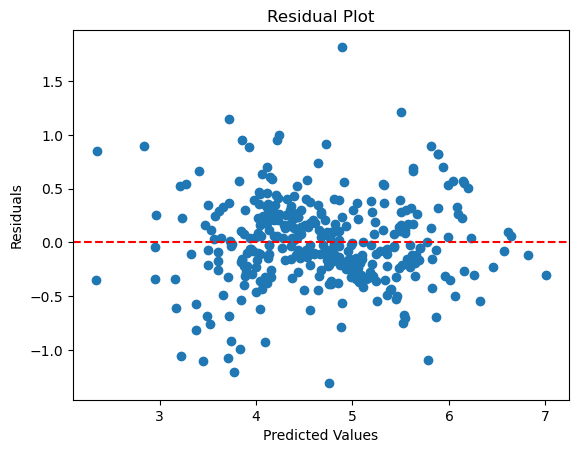

Mean of residuals: 3.639649786830471e-14
Mean Squared Error: 0.16


In [43]:
#Checking homoscedasticity of model

# Plotting residuals vs. predicted values
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

print("Mean of residuals:",np.mean(residuals))
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean square error has also decreased so we can conclude that now our model gives best fit to predict 'medv'.

### <font color= indigo>Deploying model on testing data<font>

In [44]:
#scaling numerical features
num_vars = ['crim', 'nox','rm','dis','ptratio','lstat']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [48]:
#Applying transformation on medv
y_test = stats.boxcox(y_test, lmbda = lambda_value)
print(X_test.head())

     const      crim  chas       nox        rm       dis  rad   ptratio  \
173    1.0  0.001162     0  0.246347  0.552866  0.154823    5  0.400000   
274    1.0  0.000682     1  0.114823  0.619094  0.304836    4  0.511111   
491    1.0  0.001352     0  0.453027  0.469016  0.073261    4  0.788889   
72     1.0  0.001160     0  0.043841  0.484895  0.431623    4  0.688889   
452    1.0  0.069142     0  0.670146  0.529822  0.125676   24  0.800000   

        lstat  
173  0.448121  
274  0.079726  
491  0.719452  
72   0.254874  
452  0.701712  


In [49]:
#Fitting final linear model to test dataset
X_test = sm.add_constant(X_test) # Adding constant variable to test dataframe
y_test_pred = lr2.predict(X_test)

In [50]:
from scipy.stats import pearsonr
r2,p_value= pearsonr(y_test, y_test_pred)
print("R^2: ", r2*r2)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2*r2)*(n-1)/(n-p-1)
print("Adjusted R^2: ", adjusted_r2)

model = LinearRegression()
cv_scores = cross_val_score(model, X_test, y_test, cv=5)

print("Mean Cross validation Score:", cv_scores.mean())

R^2:  0.7812148886867234
Adjusted R^2:  0.7673482267020791
Mean Cross validation Score: 0.6987536756209833


# Conclusion

We obtained following results in our fitted linear model(for test data):
 1.  R^2:  0.7481438973006375
 2.  Adjusted R^2:  0.7321811865661708
 3.  Mean Cross validation Score: 0.6666391894052562    
So our model seems to provide a good estimate to predict 'medv' values.

We obtained following results in our improved linear model(for test data):
 1.  R^2:  0.7812148886867234
 2.  Adjusted R^2:  0.7673482267020791
 3.  Mean Cross validation Score: 0.6987536756209833

We can also see from beta coefficients that variables like 'lstat','crim' and 'rm' have great impact on 'medv' value.